## Introduction
```13-Feb-2024```

The following is an exploration of the collections of the [Library of Congress](https://www.loc.gov/collections/) via their API.

## Load Packages

We first load the required packages for this simple exploration.

_Note: As I'm from an R background, please confirm, shoud they be called packages or modules?_

In [1]:
### Import Packages

# Get and Manipulate Data
import requests
import json

# Display Images
from PIL import Image
from io import BytesIO

# Display Graph
import pandas as pd
%matplotlib inline
from collections import Counter
import math

# Add a delay where needed
from time import sleep

## Create Helper Functions

We next create five helper functions which will be used throughout our exploration.

In [2]:
def get_val_from_json(collections_json, used_key, head_key = "results"):
    """Retrieves and returns values from a JSON file, handling pagination if present.

    Args:
        collections_json (json): The json to be searched, assume in the stucture of loc
        used_key (str): The key for the values to be returned

    Returns:
        list: A list of values or an empty list if the file is missing or corrupt.

    Raises:
        IOError: If the file cannot be opened.
        JSONDecodeError: If the JSON is invalid.
    """
    values = []
    while True:
        for collection in collections_json.get(head_key, []):
            value = collection.get(used_key)
            if value:
                values.append(value)

        next_page = collections_json.get("pagination", {}).get("next")
        if not next_page:
            break  # No more pages, exit loop

        try:
            collections_json = requests.get(next_page).json()
        except requests.exceptions.RequestException as e:
            print(f"Error fetching next page: {e}")
            break  # Handle exception and exit

    return values


#####


def explore_json_structure(data, seen_values=None):
    """

    Recursively explores the structure of a JSON-like object (dictionary or list).

    Args:
        data (json): The JSON-like object to explore.
        seen_values: Set to track seen values (optional).

    Returns:
        A representation of the structure (e.g., nested dictionaries or lists).
    """
    if seen_values is None:
        seen_values = set()
    if isinstance(data, dict):
        if len(data) == 1:
            key, value = next(iter(data.items()))
            return {key: explore_json_structure(value, seen_values)}
        else:
            return {key: explore_json_structure(value, seen_values) for key, value in data.items()}
    elif isinstance(data, list):
        if len(data) > 1:
            return [explore_json_structure(data[0], seen_values)]
        else:
            return [explore_json_structure(item, seen_values) for item in data]
    else:
        if data not in seen_values:
            seen_values.add(data)
            return "VALUE"
        else:
            return "VALUE"


#####


def roundup(x):
    """

    Round a number up to the nearest ten

    Args:
        x : The number to roundup
        seen_values: Set to track seen values (optional).

    Returns:
        The desired number rounded up.
    """
    return math.ceil(x / 10.0) * 10


#####


def total_pages(total_items_cnt, divisor = 25):
    """
    This function calculates the total number of pages needed if a certain number of items are distributed across pages with a specified limit.

    Args:
    total_items_cnt (int): The total number of items to be distributed.
    divisor (int, optional): The maximum number of items that can fit on a page. Defaults to 25.

    Returns:
    int: The total number of pages required to accommodate all items.
    """
    count = ((total_items_cnt % divisor) > 0) + (total_items_cnt // divisor)
    return count


#####


def count_topics(id, total_items_cnt, num_per_page = 25, time_delay_sec = 5, used_key = "subject"):
    """
    Counts the occurrence of topics in a collection of items online (LOC specific).

    Args:
    id: The identifier for the collection of items.
    total_items_cnt (int): The total number of items in the collection.
    num_per_page (int, optional): The number of items per page. Defaults to 25.
    time_delay_sec (int, optional): The time delay in seconds between requests. Defaults to 5.
    used_key (str, optional): The key used to access the topics in each item. Defaults to "subject".

    Returns:
    Counter: A Counter object with the count of each topic.

    This function iterates over a paginated collection of items, counting the occurrence of each topic. It uses the 'requests' library to fetch the data and a Counter object to keep track of the counts. It includes error handling for failed requests and uses a delay between requests to avoid overloading the server.
    """
    # Setup Counter
    topic_counter = Counter()
    
    # Create Initial Page Number
    page_num = 1
    
    # State number of items in the list
    list_cnt = num_per_page
    
    # Create maximum amount of pages to iterate
    page_tot = total_pages(total_items_cnt, num_per_page)
    
    # Create first url
    collection_json_url = collections_links[id].replace("about-this-collection/", f"?sp={page_num}&st=list&c={list_cnt}&fo=json&at=results")
    # Download Set of Details
    collection_json = requests.get(collection_json_url).json()
    
    while page_num <= page_tot:
        for item in collection_json["results"]:
            if used_key in item and item[used_key] is not None:
                for topic in item[used_key]:
                    topic_counter[topic] += 1
        page_num += 1
        next_page = collection_json_url.replace(f"sp={page_num - 1}", f"?sp={page_num}")
        try:
            collection_json = requests.get(next_page).json()
            sleep(time_delay_sec)
        except requests.exceptions.RequestException as e:
            print(f"Error fetching next page: {e}")
            break  # Handle exception and exit
            
    return topic_counter


## Data Prep

We now get the details of all the collections and display a simple json which helps us to see the overall structure of the document.

In [3]:
url = "https://www.loc.gov/collections/?fo=json"

collections_json = requests.get(url).json()

In [4]:
collections_simple_struct = explore_json_structure(collections_json)

print(json.dumps(collections_simple_struct, sort_keys=True, indent=2))

{
  "breadcrumbs": [
    {
      "Library of Congress": "VALUE"
    }
  ],
  "browse": {
    "facets": {
      "include": [
        {
          "field": "VALUE",
          "label": "VALUE"
        }
      ]
    },
    "sortBy": "VALUE",
    "style": "VALUE"
  },
  "categories": [
    "VALUE"
  ],
  "content": {
    "active": "VALUE",
    "link": "VALUE",
    "markup": "VALUE",
    "pagination": "VALUE",
    "partof": [],
    "results": [
      {
        "access_restricted": "VALUE",
        "aka": [
          "VALUE"
        ],
        "campaigns": [],
        "count": "VALUE",
        "description": [
          "VALUE"
        ],
        "digitized": "VALUE",
        "extract_timestamp": "VALUE",
        "group": [
          "VALUE"
        ],
        "hassegments": "VALUE",
        "id": "VALUE",
        "image_url": [
          "VALUE"
        ],
        "index": "VALUE",
        "items": "VALUE",
        "original_format": [
          "VALUE"
        ],
        "other_title": [],
 

Armed with our understanding of the json structure, we now collect the following into lists:
 - Title of the Collection
 - Cover image of the Collection
 - Link to the Collection's About Page
 - Description of the Collection
 - Number of items in the Collection

In [5]:
# We include the sleep function to not cause a burden on the servers
collections_titles = get_val_from_json(collections_json, "title")
sleep(5)
collections_images = get_val_from_json(collections_json, "image_url")
sleep(5)
collections_links = get_val_from_json(collections_json, "url")
sleep(5)
collections_desc = get_val_from_json(collections_json, "description")
sleep(5)
collections_count = get_val_from_json(collections_json, "count")

In [6]:
print("The following is a sanity check where all the values listed below should be equal.\n")
print(f"They are {len(collections_titles)} collections in the Library of Congress")
print(f"These collections have a total of {len(collections_images)} images across them")
print(f"These collections have a total of {len(collections_links)} main links across them")
print(f"These collections have a total of {len(collections_desc)} descriptions across them")
print(f"These collections have a total of {len(collections_count)} counts of items")

The following is a sanity check where all the values listed below should be equal.

They are 524 collections in the Library of Congress
These collections have a total of 524 images across them
These collections have a total of 524 main links across them
These collections have a total of 524 descriptions across them
These collections have a total of 524 counts of items


We lastly create two functions which we will use to query any single collection and return some information about it.

The first will do so will only extend how much items to return, while the second will use this and pagination as well.

In [7]:
def show_collection(id, n = 50):
    """
    Displays information about a collection and plots the count of the top subjects in the collection.

    Args:
    id: The identifier for the collection.
    n (int, optional): The maximum number of subjects to include in the plot. Defaults to 50.

    This function first prints the title, link, and description of the collection, and displays an image from the collection.
    It then counts the occurrence of each subject in the collection using the `count_topics` function.
    Finally, it plots a horizontal bar chart of the count of the top subjects in the collection.
    """    
    print(f"Title: {collections_titles[id]}")
    print(f"Link: {collections_links[id]}")
    display(Image.open(BytesIO(requests.get(collections_images[id][0]).content)))
    print(collections_desc[id][0])
    print("\n\n\n")
    ###
    list_cnt = roundup(collections_count[id])
    collection_json_url = collections_links[id].replace("about-this-collection/", f"?st=list&c={list_cnt}&fo=json&at=results")
    print(f"JSON Link: {collection_json_url}")
    ###
    subject_counter = Counter()
    collection_json = requests.get(collection_json_url).json()
    for item in collection_json["results"]:
        if "subject" in item and item["subject"] is not None:
            for subject in item["subject"]:
                subject_counter[subject] += 1
    ###
    print(f"Items in Collection: {collections_count[id]}")
    print(f"Unique Number of Subjects: {len(subject_counter)}")
    ###
    if n > len(subject_counter):
        top_v = len(subject_counter)
    else:
        top_v = n
    print(f"\nPlot Showing Count of Top {top_v} Subjects in Collection")
    subjects = pd.Series(subject_counter)
    top_n_subjects = subjects.nlargest(n)
    top_n_subjects.sort_values(ascending=True).plot(kind='barh', figsize=(12,12))
    ###


    



In [8]:
def show_collection_pag(id, max_num_plot = 50, num_per_page = 25, time_delay_sec = 5, used_key = "subject"):
    """
    Displays information about a collection and plots the count of the top subjects in the collection.

    Args:
    id: The identifier for the collection.
    max_num_plot (int, optional): The maximum number of subjects to include in the plot. Defaults to 50.
    num_per_page (int, optional): The number of items per page when counting topics. Defaults to 25.
    time_delay_sec (int, optional): The time delay in seconds between requests when counting topics. Defaults to 5.
    used_key (str, optional): The key used to access the subjects in each item when counting topics. Defaults to "subject".

    This function first prints the title, link, and description of the collection, and displays an image from the collection.
    It then counts the occurrence of each subject in the collection using the `count_topics` function.
    Finally, it plots a horizontal bar chart of the count of the top subjects in the collection.

    This versionn uses pagination and time delays within the pagination.
    """
    print(f"Title: {collections_titles[id]}")
    print(f"Link: {collections_links[id]}")
    display(Image.open(BytesIO(requests.get(collections_images[id][0]).content)))
    print(collections_desc[id][0])
    print("\n\n\n")
    ###
    list_cnt = roundup(num_per_page)
    collection_json_url = collections_links[id].replace("about-this-collection/", f"?st=list&c={list_cnt}&fo=json&at=results")
    print(f"JSON Link: {collection_json_url}")
    ###
    subject_counter = count_topics(id, collections_count[id], num_per_page, time_delay_sec, used_key)
    ###
    print(f"Items in Collection: {collections_count[id]}")
    print(f"Unique Number of Subjects: {len(subject_counter)}")
    ###
    if max_num_plot > len(subject_counter):
        top_v = len(subject_counter)
    else:
        top_v = max_num_plot
    print(f"\nPlot Showing Count of Top {top_v} Subjects in Collection")
    subjects = pd.Series(subject_counter)
    top_n_subjects = subjects.nlargest(max_num_plot)
    top_n_subjects.sort_values(ascending=True).plot(kind='barh', figsize=(12,12))


# Analysis of Single Collection

Finally we run our analysis.
Feel free to change the number in the function, each number is a reference to one of the collections.

You may see which number matches which collection in the appendix.

_Bear in mind, this still isn't perfect as some collections have so many items that we are unable to capture all the unique subjects.
As such you may enter a second number in the function which limits the amount of subjects shown, currently it is set to 50 as a default._


Title: Webcomics Web Archive
Link: https://www.loc.gov/collections/webcomics-web-archive/about-this-collection/


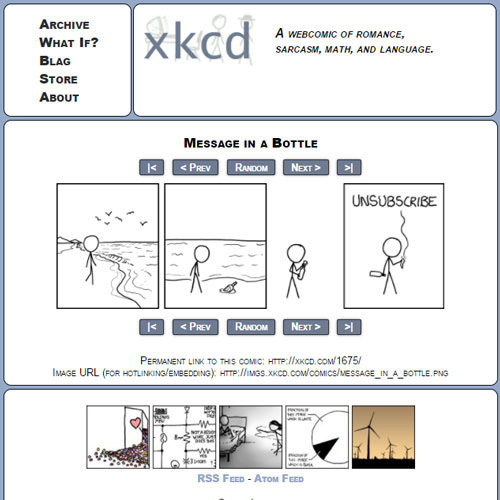

Collection Period: June 4, 2014 to ongoing. This collection focuses on comics created specifically for the web and supplements the Library of Congress’ extensive holdings in both comic books, graphic novels, and original comic art. Webcomics are an increasingly popular format utilized by contemporary creators in the field and often includes material by artists not available elsewhere. Webcomics selected for this collection include award-winning comics (Eisner Awards, Harvey Awards, Eagle Awards, and Shuster Awards) as well as webcomics that have significance in the field due to longevity, reputation, and subject matter. This collection includes work by artists and subjects not traditionally represented in mainstream comics, including women artists and characters, artists and characters of color, LGBTQ+ artists and characters, as well as subjects such as politics, health and human sexuality, and autobiography. The content of these websites is captured as it was originally produced and m

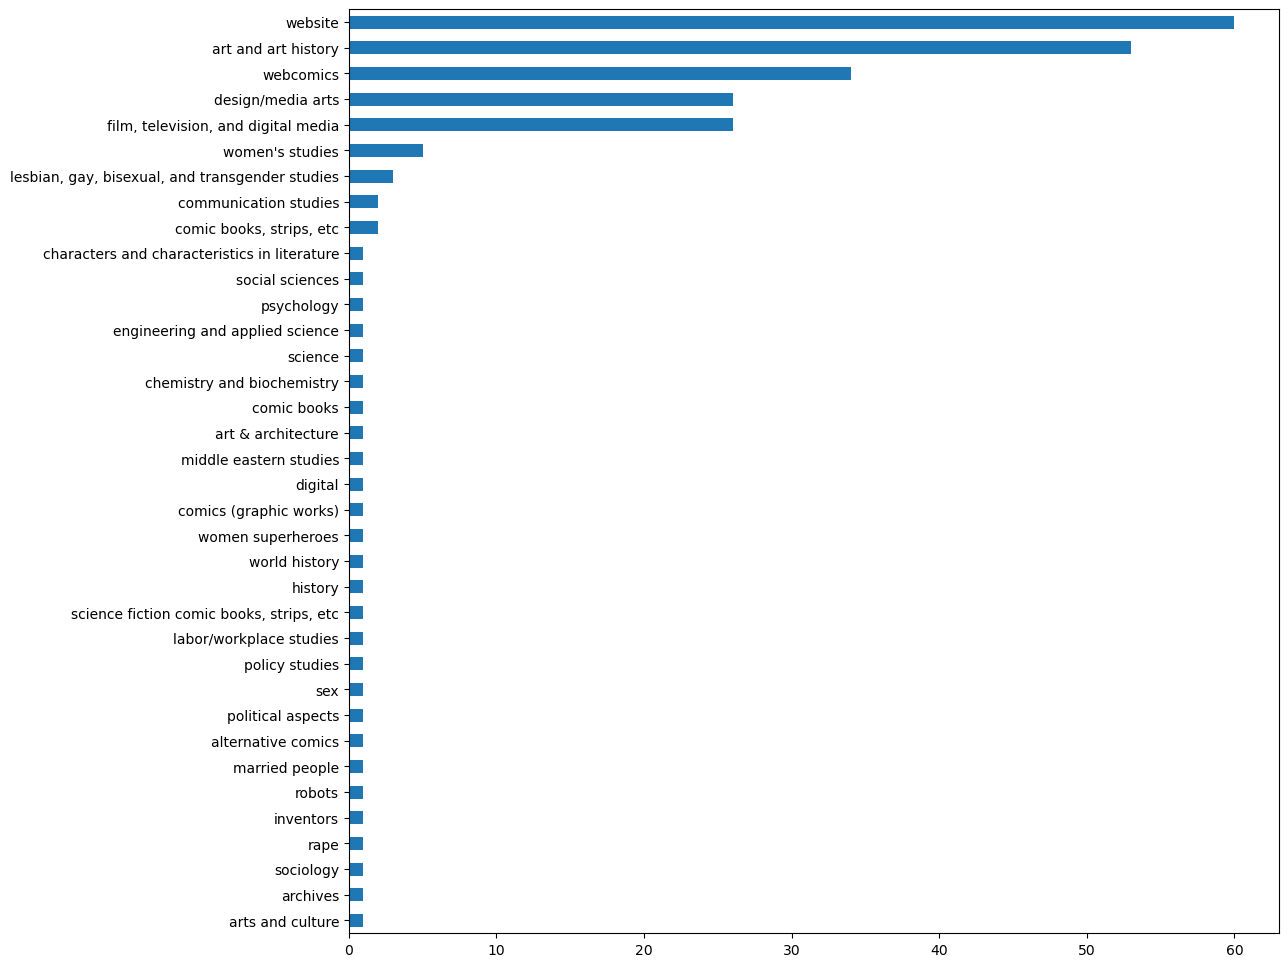

In [9]:
show_collection(489)

The following function now uses pagination and includes a delay.


**Note:** This version still has some bugs which I've to yet get rid of, if you check it's counts, it does not perfectly match with the website when it moves from page to page.

The value seems to be consistently lower, but I should be accounting for remainders.

I may revisit in the future to solve.

Title: Abraham Lincoln Papers at the Library of Congress
Link: https://www.loc.gov/collections/abraham-lincoln-papers/about-this-collection/


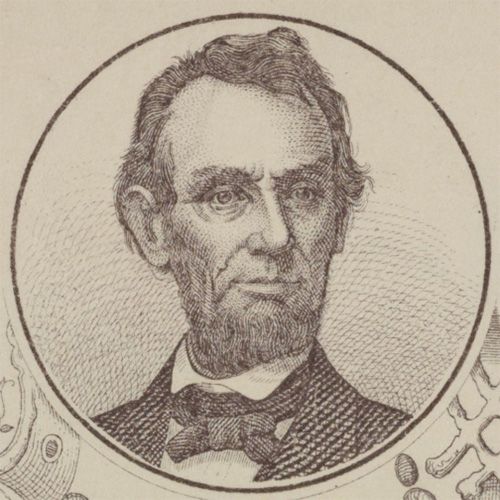

The papers of Abraham Lincoln (1809-1865), lawyer, representative from Illinois, and sixteenth president of the United States, contain approximately 40,550 documents dating from 1774 to 1948, although most of the collection spans from the 1850s through Lincoln&rsquo;s presidency (1861-1865).  Roughly half of the collection, more than 20,000 documents, comprising 62,000 images, as well as transcriptions of approximately 10,000 documents, is online. Included on this website in their entirety are Series 1-3 of the Lincoln Papers and the original materials in Series 4. Excluded from this online presentation is a sizeable portion of Series 4, which consists of printed material and reproductions of government and military documents made from originals in the holdings of the National Archives and Records Administration.




JSON Link: https://www.loc.gov/collections/abraham-lincoln-papers/?st=list&c=500&fo=json&at=results
Items in Collection: 20206
Unique Number of Subjects: 6

Plot Showing C

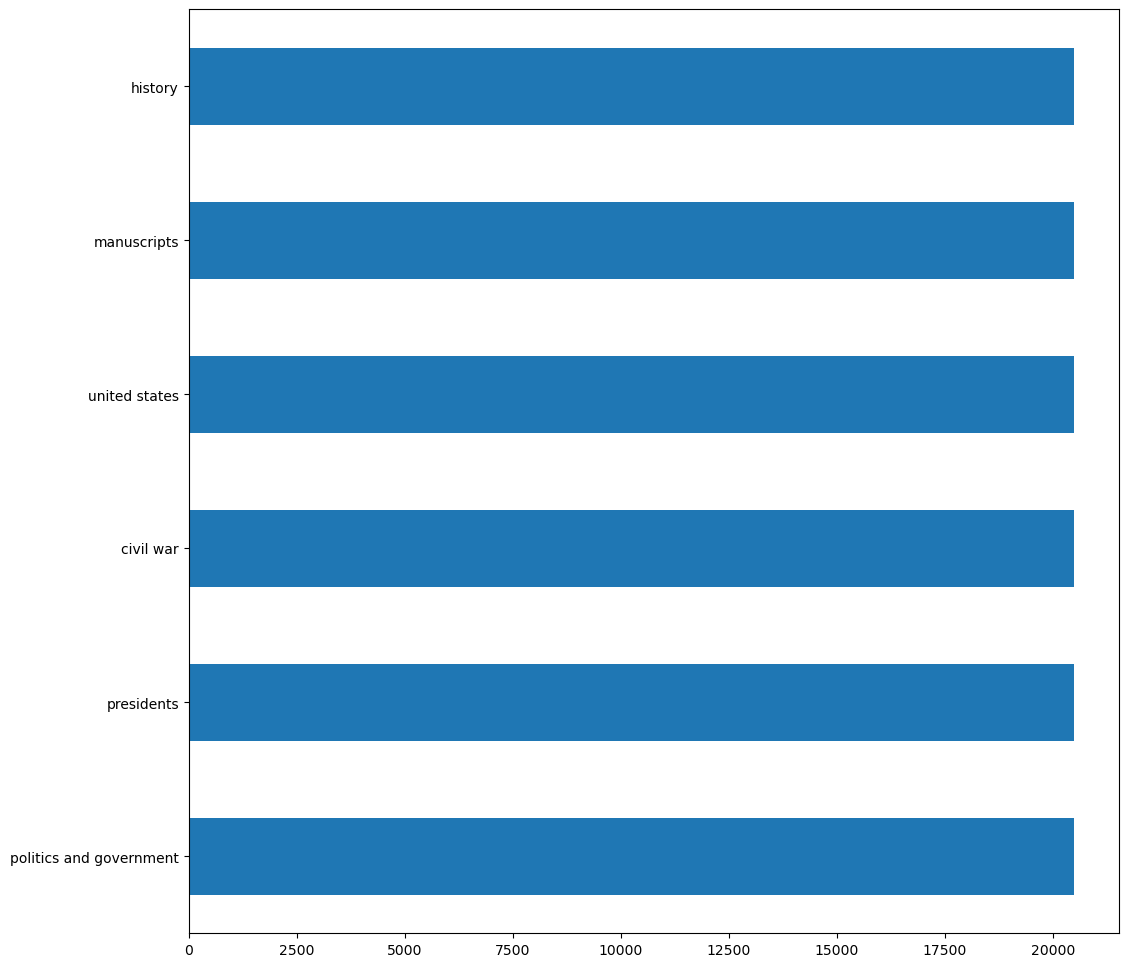

In [10]:
show_collection_pag(5, 50, 500, 3)

## Appendix

You may use the below list to find which ID to use to pull the information you're interested in.

In [11]:
for i, item in enumerate(collections_titles):
    print(f"{i} - {item}")

0 - 10th-16th Century Liturgical Chants
1 - A.P. Schmidt Company archives, 1869-1958
2 - Aaron Copland Collection
3 - Abdul Hamid II Collection
4 - Abdul-Hamid II Collection of Books and Serials Gifted to the Library of Congress
5 - Abraham Lincoln Papers at the Library of Congress
6 - Afghanistan Web Archive
7 - Afghanistan, Iran, Pakistan and Tajikistan Government Web Archive
8 - Afghanistan, Iran, Pakistan, and Tajikistan Elections Web Archive
9 - African American Perspectives: Materials Selected from the Rare Book Collection
10 - African American Photographs Assembled for 1900 Paris Exposition
11 - African Government Web Archive
12 - African-American Band Music & Recordings, 1883-1923
13 - Africana Historic Postcard Collection
14 - After the Day of Infamy: "Man-on-the-Street" Interviews Following the Attack on Pearl Harbor
15 - Ainu and Ezochi Rare Collection
16 - Alan Lomax Collection
17 - Alan Lomax Collection of Michigan and Wisconsin Recordings
18 - Albert Schatz Collection
19 